In [6]:
require(ggplot2)
require(data.table)
require(Hmisc)
require(ggthemes)
require(gridExtra)
require(grid)
require(lattice)
require(scales)
require(RColorBrewer)

In [7]:
# install.packages('bit64')

In [8]:
directory = "/mnt/sdb1/baseerat/numerical-evals/1-25-2018/logs-1M/"
blues = brewer.pal(n = 6, "Blues")[4:6]
plotTheme <- theme_hc() + theme(legend.title=element_blank(), 
                                legend.position="none", 
                                legend.text=element_text(size=8))

In [9]:
switchUpdateCount <- fread(paste(directory, "switch_update_count.csv", sep="/"), sep=",", header=TRUE)

Read 4333815 rows and 18 (of 18) columns from 0.483 GB file in 00:00:09


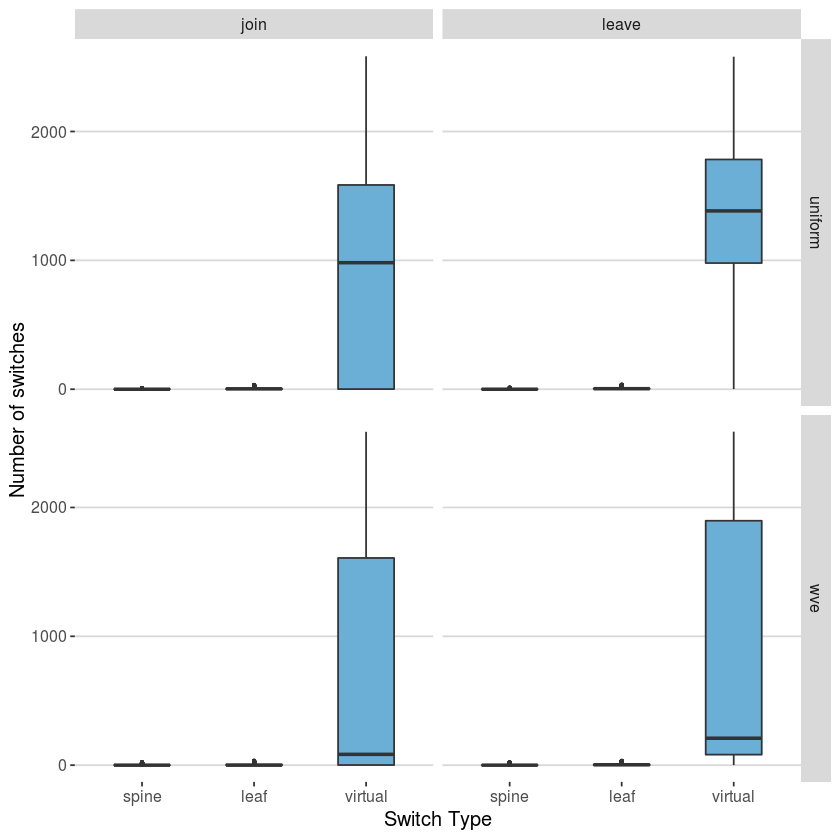

In [10]:
p1 <- ggplot(switchUpdateCount[leafsAlgorithm != "exact-match"]) +
   geom_boxplot(aes(y=updates, x=factor(switch, levels=c('spine','leaf','virtual')), 
                    fill=interaction(leafsAlgorithm, leafsNumBitmaps, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap,
                                     leafsNumRules, placementNumHostsPerLeaf)),
                outlier.size=0.5, width=0.5) +
   facet_grid(groupSizeDist ~ factor(event)) +
   xlab("Switch Type") +
   scale_fill_manual(values=blues) +
   ylab("Number of switches") +
   plotTheme
p1

In [11]:
# ggsave(plt, file="switch_update_count.pdf", height=5, width=7)
ggsave(p1, file="switch_update_count.jpg", height=2, width=4)

In [12]:
switchUpdateCountNormalized <- fread(paste(directory, "switch_update_count_normalized.csv", sep="/"), sep=",", header=TRUE)

Read 4333815 rows and 18 (of 18) columns from 0.524 GB file in 00:00:08


In [13]:
head(switchUpdateCountNormalized)

,updates,switch,event,groupSizeDist,placementDist,placementNumHostsPerLeaf,seed,podsAlgorithm,podsNumBitmaps,podsNumNodesPerBitmap,podsRedundancyPerBitmap,podsNumRules,leafsAlgorithm,leafsNumBitmaps,leafsNumNodesPerBitmap,leafsRedundancyPerBitmap,leafsNumRules,numEvents
1,0.000259403372243839,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,12,64000,1000000
2,0.503371369294606,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,12,64000,1000000
3,0.503240860772621,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,12,64000,1000000
4,0.523342790817642,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,12,64000,1000000
5,0.000257864878803507,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,12,64000,1000000
6,0.523330755349317,virtual,join,uniform,colocate-uniform,uniform,0,random-fuzzy-match,2,3,6,64000,random-fuzzy-match,30,3,12,64000,1000000


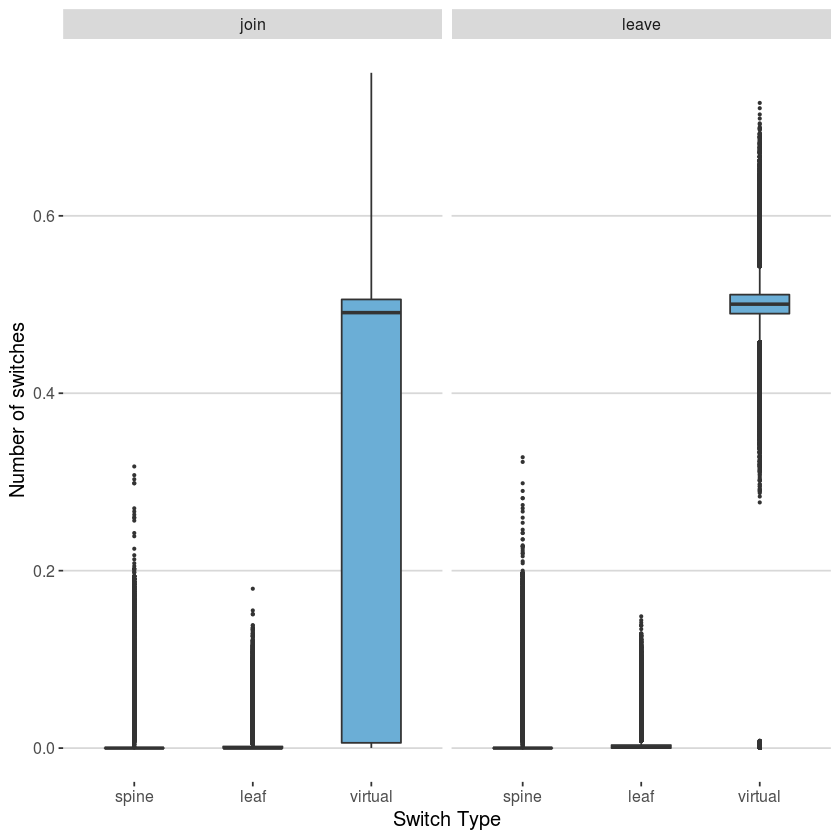

In [14]:
p2 <- ggplot(switchUpdateCountNormalized[leafsAlgorithm != "exact-match" 
                                         & groupSizeDist == "wve"]) +
   geom_boxplot(aes(y=updates, x=factor(switch, levels=c('spine','leaf','virtual')), 
                    fill=interaction(leafsAlgorithm, leafsNumBitmaps, leafsNumNodesPerBitmap, leafsRedundancyPerBitmap,
                                     leafsNumRules, placementNumHostsPerLeaf)),
                outlier.size=0.5, width=0.5) +
   facet_grid(. ~ factor(event)) +
   xlab("Switch Type") +
   scale_fill_manual(values=blues) +
   ylab("Number of switches") +
   plotTheme
p2

In [17]:
switchUpdateCountNormalized[leafsAlgorithm != "exact-match" & groupSizeDist == "wve", mean(updates), by=list(switch, event)]

,switch,event,V1
1,virtual,join,0.335113053782746
2,virtual,leave,0.49995308090898
3,leaf,join,0.00419223236710542
4,leaf,leave,0.00605894898758057
5,spine,join,0.00155932536700294
6,spine,leave,0.00233316501281849


In [16]:
# ggsave(p2, file="switch_update_count_normalized.pdf", height=2, width=4)
ggsave(p2, file="switch_update_count_normalized.jpg", height=2, width=4)